# Exercise 1: Playing with dice (Central Limit Thm)
Consider the problem of throwing dice multiple times and numerically calculate the resulting probability distribution.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Throwing one die

We throw a die once, generating an integer number in the range from 1 to 6. 
Compute the mean value and variance given respectively by the following formulas:

$$
\mu = \langle x \rangle = \frac{1}{6} \sum_{i=1}^{6} x_i,
$$
and
$$
\sigma^2 = \langle x^2 \rangle - \langle x \rangle^2,
$$

where:

$$
\langle x^2 \rangle = \frac{1}{6} \sum_{i=1}^{6} x_i^2.
$$

In [24]:
xi = np.arange(1,7) # possible outcomes of a dice roll: 1, 2, 3, 4, 5, 6
xi_2 = xi**2

# Mean
mu = np.sum(xi) / len(xi)

# Variance
sig_2 = np.sum(xi_2) / len(xi_2) - mu**2

print(f"Mean value (mu) is {mu}")
print(f"Variance (sigma^2) is {sig_2}")


Mean value (mu) is 3.5
Variance (sigma^2) is 2.916666666666666


Use a random number generator to simulate dice throwing and calculate the resulting probability distribution $p_i$ of obtaining each number $i$ from 1 to 6 using discrete normalization: $\sum_i p_i = 1$.

The random variable of interest is $x = \text{rand}(6)$.

Generate $N_{iter}$ random numbers and use them for the calculation of the probability distribution of finding $x = (1, \dots, 6)$. 

Plot the resulting probability distribution function $p_i$ (with $i= 1, \dots, 6$) and compare it with uniform distibution prediction. 

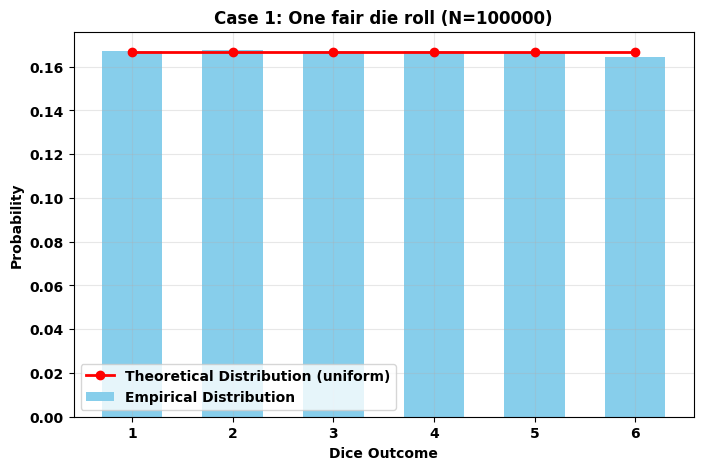

In [25]:
N = 100000 # number of random samples/rolls


# Case 1: One fair die roll (simulation)
rolls = np.random.randint(1, 7, size=N)
values, counts = np.unique(rolls, return_counts=True)
p1 = counts / N # probability distribution


# Theoretical PDF (uniform distribution)
p1_theory = np.ones(len(xi)) / len(xi)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(values, p1, width=0.6, color='skyblue', label='Empirical Distribution')
plt.plot(xi, p1_theory, 'ro-', lw=2, label='Theoretical Distribution (uniform)')

plt.xlabel('Dice Outcome')
plt.ylabel('Probability')
plt.title(f'Case 1: One fair die roll (N={N})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### 2.2 Throwing two dice

We now throw a die twice, $N_{dice} = 2$, and calculating the average value,

$$
x = \frac{\text{rand}(6) + \text{rand}(6)}{2},
$$


Calculate the probability distribution of the outcome $x = (1, 1.5, 2, 2.5, ..., 6)$ and show it in the figure.

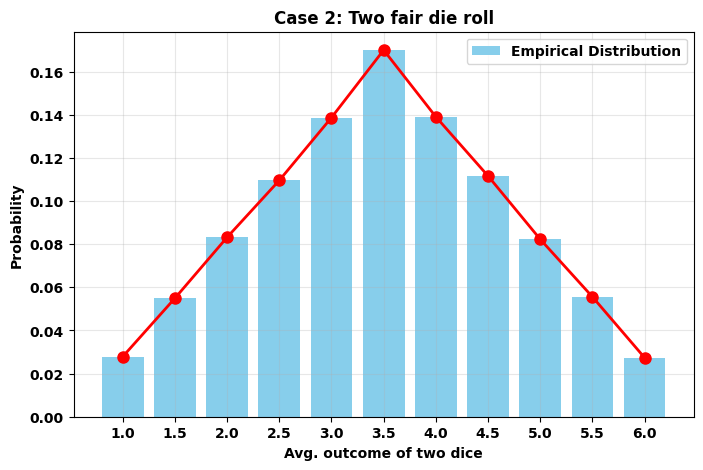

In [26]:
xi_avg = np.arange(1, 6.5, 0.5) 
xi_avg_2 = xi_avg**2

rolls2 = np.random.randint(1, 7, size=(N, 2)) # two sets of rolls for the two dice. Resulting matrix has N rows (experiments) and 2 columns (dice)
avgs = np.mean(rolls2, axis=1) # average of the two dice for each experiment
values_avg, counts_avg = np.unique(avgs, return_counts=True) # we can use unique since the averages are still discrete
p2 = counts_avg / N

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(values_avg, p2, width=0.4, color='skyblue', label='Empirical Distribution')
plt.plot(xi_avg, p2, 'ro-', lw=2, markersize=8)
plt.xlabel('Avg. outcome of two dice')
plt.ylabel('Probability')
plt.title('Case 2: Two fair die roll')
plt.xticks(xi_avg)
plt.legend()
plt.grid(True, alpha=0.3)



### 2.3 Throwing multiple dice

Consider now throwing a die $N_{dice}$ times, and calculate the average value,

$$
x = \frac{\sum^{N_{dice}}_{i=1} \text{rand}(6)}{N_{dice}}.
$$

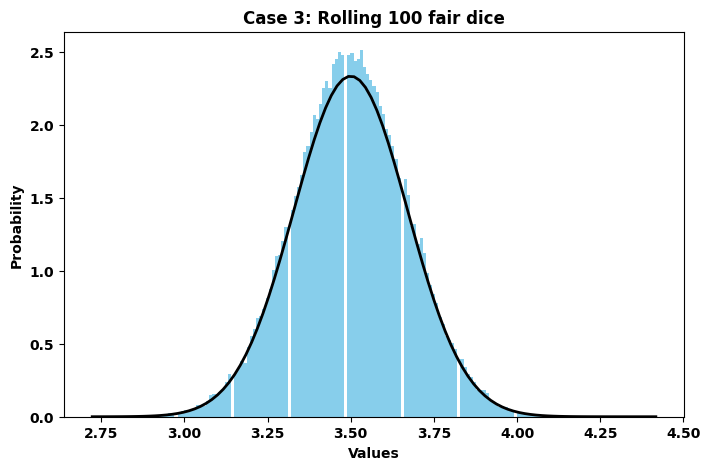

In [ ]:
from scipy.stats import norm

N_dice = 100
dx = 1/N_dice

# Experiment: rolling 100 dice N times
rolls_matrix = np.random.randint(1, 7, size=(N, N_dice))
avgs_N = np.mean(rolls_matrix, axis=1) # average of the 100 dice for each experiment


# Plotting
# note that for large N_dice, the distribution of averages becomes approximately continuous, so we use a histogram
plt.figure(figsize=(8, 5))
plt.hist(avgs_N, bins='auto', density=True, color='skyblue', label='Simulation')

# Theoretical PDF (Gaussian distribution)
sigma = np.sqrt(sig_2)/np.sqrt(N_dice)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label="Gaussian")

plt.xlabel("Values")
plt.ylabel("Probability")
plt.title(f"Case 3: Rolling {N_dice} fair dice")
plt.show()


# CHECK MISSING PARTS FROM THE ORIGINAL QUESTION



## Error estimation

Assume that single-die throwing is used to estimate the mean value $\mu$. 

Estimate $\mu$ by throwing $N_{iter} = 10$ and $N_{iter} = 100$ dice. 

Estimate the statistical error by $\sigma'$. 

Report the obtained numbers.

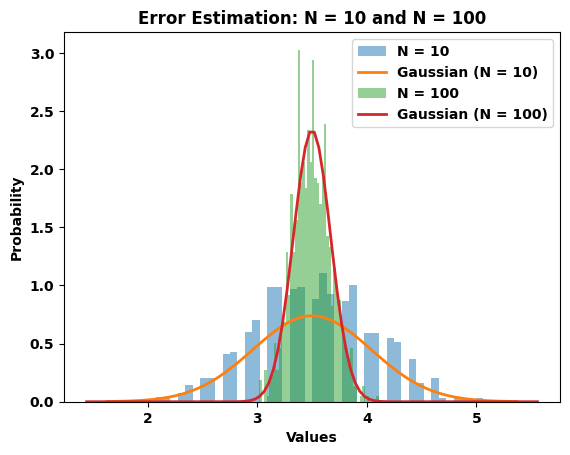

N = 10:
  Mean: 3.51
  Standard Deviation: 0.54
N = 100:
  Mean: 3.50
  Standard Deviation: 0.17


In [ ]:
# Store the means for each N
means = {}


for N_dice in [10, 100]:
    x_avg = np.zeros(N)

    for i in range(N):
        x_sum = 0
        for j in range(N_dice):
            x_sum += np.random.choice(xi)

        x_avg[i] = x_sum / N_dice

    means[N_dice] = x_avg
    # dx?

    # Plotting
    plt.hist(x_avg, bins=50, density=True, alpha=0.5, label=f'N = {N_dice}')

    # Gaussian curve
    sigma = np.sqrt(sig_2) / np.sqrt(N_dice)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, linewidth=2, label=f'Gaussian (N = {N_dice})')

plt.xlabel("Values")
plt.ylabel("Probability")
plt.title("Error Estimation: N = 10 and N = 100")
plt.legend()
plt.show()

# Report the mean and std
for N_dice in [10, 100]:
    print(f'N = {N_dice}:')
    print(f'  Mean: {np.mean(means[N_dice]):.2f}')
    print(f'  Standard Deviation: {np.std(means[N_dice]):.2f}')
